<a href="https://colab.research.google.com/github/MalihehGaroosiha/AdventureWorks-Sales-Data-Analysis/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**#1-Getting data**

**( https://archive.ics.uci.edu/ml/datasets/Iris.)**

In [ ]:
path="/content/drive/MyDrive/iris (1)/iris.data"

In [ ]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(path, names=column_names)
df.to_csv("iris_dataset.csv", index=False)

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is not any missing value and data types are correct.

In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Handling Duplicated

Two rows in the dataset appeared twice, and one row contained two values that were duplicated within the same row. Since these entries did not add new information and could affect the analysis, I removed them.**

In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:

df['class'].value_counts()

,count
class,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


After adding the new column and decoding the class column to prepare the data for the KNN algorithm, I did not drop the original class column because I prefer to see the flower names—not the numeric codes—in the scatter plot. However, the KNN algorithm does not need this column.

In [ ]:
df['target']=df['class'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})


In [ ]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


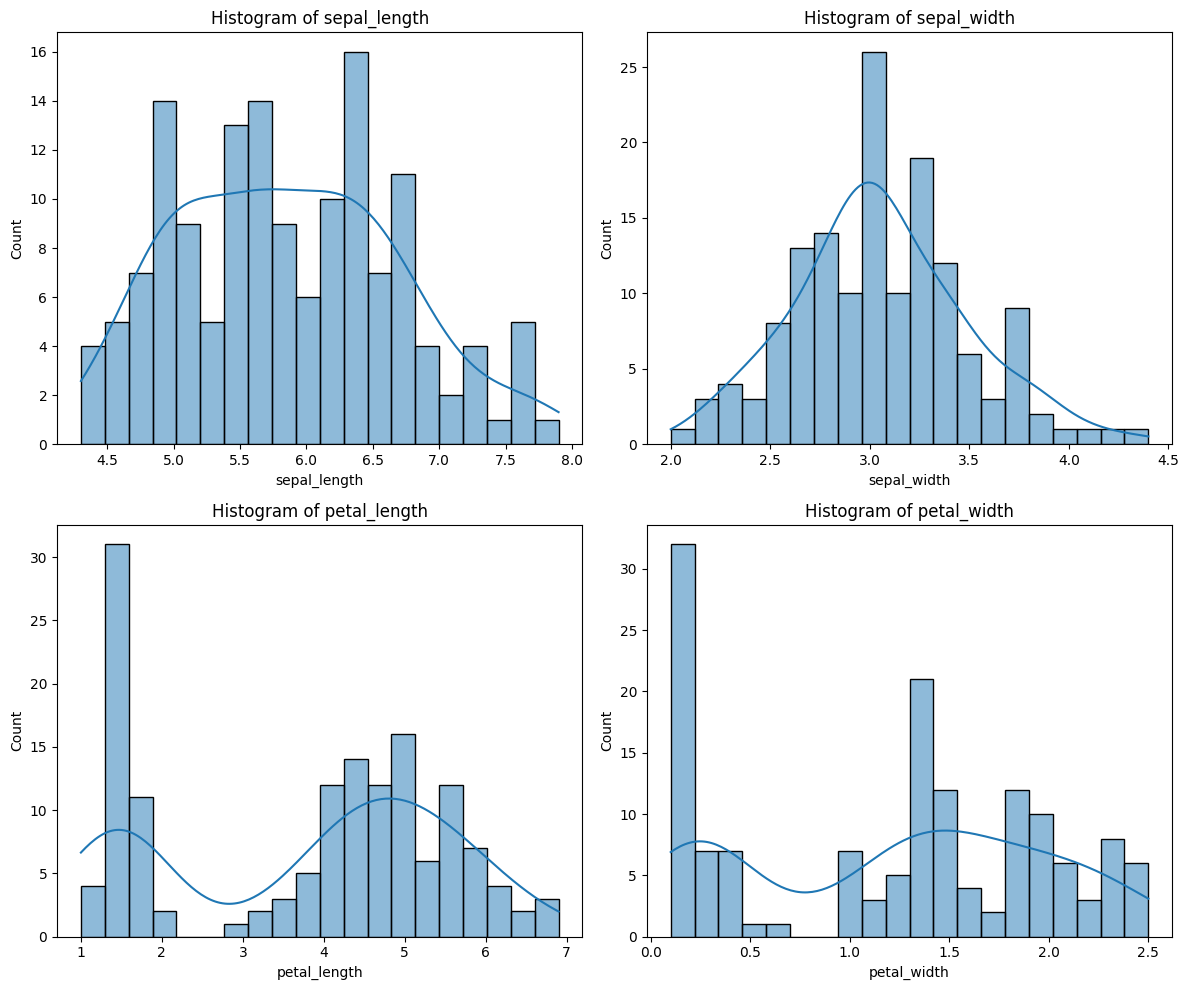

In [ ]:
plt.figure(figsize=(12, 10))
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
for i,feature  in enumerate(X, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

*The first two histograms—Sepal Length and Sepal Width—show almost normal distributions, and this suggests that applying normalization would generally improve the data. However, the two histograms below, which belong to Petal Width and Petal Length, show two different distributions(two modes) side by side. The right-side plots look normal, but the left-side plots clearly have right skewness. This indicates that the data actually come from two different distributions. One of these distributions is  right-skewed with very low normality, while the other distribution is more centered and closer to a standard normal shape.

Later, in the scatter plot, this becomes even more obvious: the Setosa flowers behave completely differently from the other two flower types. Their category shows distinct patterns in both size and distribution compared to the other two species.*

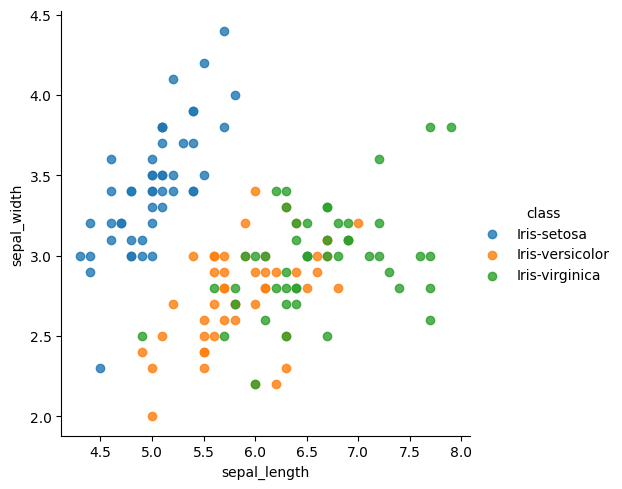

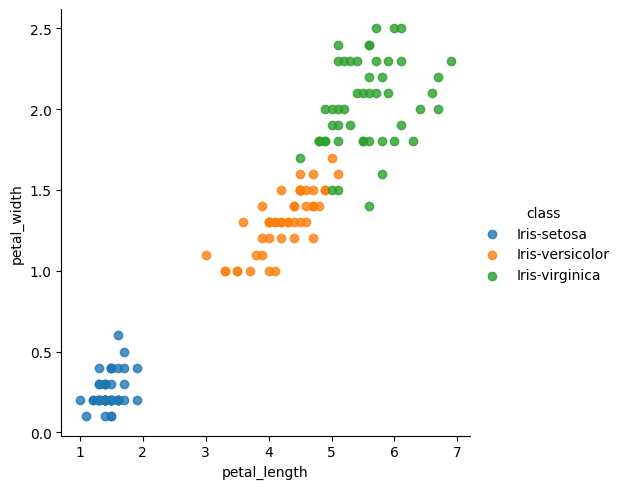

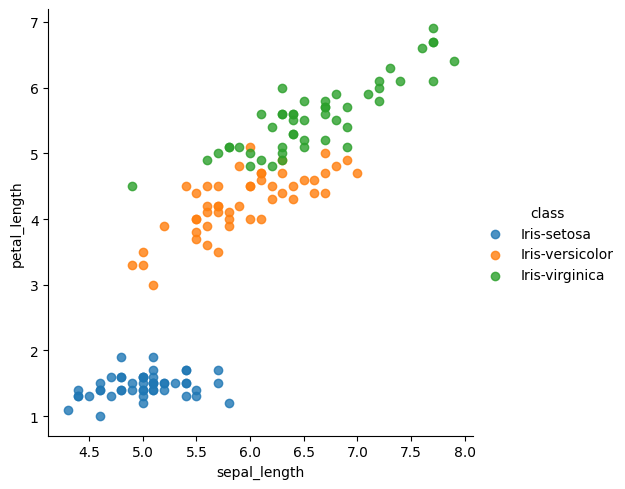

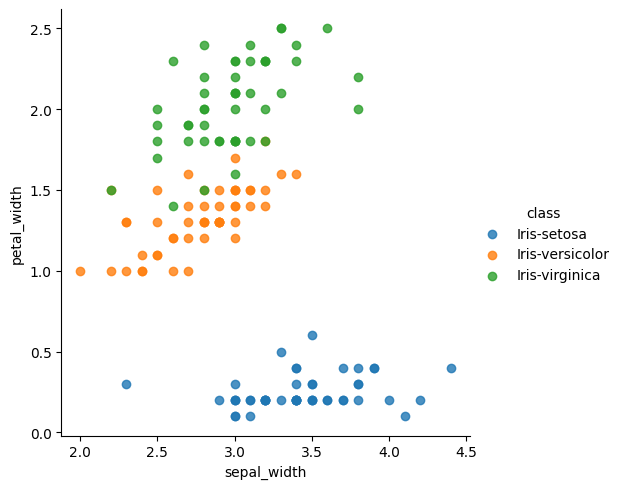

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

p1 =sns.lmplot(data=df, x='sepal_length', y='sepal_width', hue='class', fit_reg=False)
p2 = sns.lmplot(data=df, x='petal_length', y='petal_width', hue='class', fit_reg=False)
p3 = sns.lmplot(data=df, x='sepal_length', y='petal_length', hue='class', fit_reg=False)
p4 =sns.lmplot(data=df, x='sepal_width', y='petal_width', hue='class', fit_reg=False)



**From the four scatter plots, we can visually assess the presence and strength of linear relationships between pairs of features for the three Iris species.

In the first plot (sepal length vs sepal width), there is no strong overall linear relationship. Versicolor and Virginica show only a weak linear trend, while Setosa behaves quite differently from the other two classes and forms its own cluster. Any linear pattern between sepal length and sepal width appears weak compared with the petal-based features.

In the second plot (petal length vs petal width), there is a clear and strong positive linear relationship: as petal length increases, petal width also increases in a nearly linear way for Versicolor and Virginica, and the three species are well separated in this space.

In the third plot (sepal length vs petal length), a reasonably strong linear relationship is visible for Versicolor and Virginica, while Setosa follows a very different pattern and does not exhibit the same linear trend as the other two species.

In the fourth plot (sepal width vs petal width), Setosa again does not show a clear linear relationship, but Versicolor and Virginica display a weaker positive linear trend compared with the second and third plots.

After observing these approximate linear patterns in the scatter plots, I confirm them numerically by computing the Pearson correlation coefficients for each pair of numeric features and visualizing them in a correlation heatmap. The values in the heatmap are consistent with what is seen in the scatter plots: petal-based feature pairs have the strongest linear correlations, while sepal-based pairs show weaker correlations.**

For further investigation, I checked the heatmap, and here is the output showing the high linear correlation between these features

1-Corrolation between Petal Length and Petal Width is .96

2-Corrolation between Petal Length and Sepal Length is .87

3-Corrolation between Septal Length and Petal Width is .82

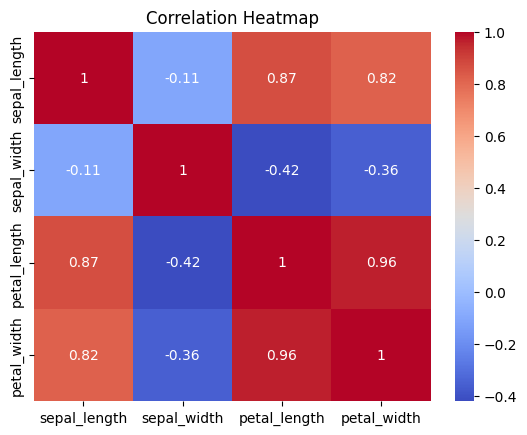

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

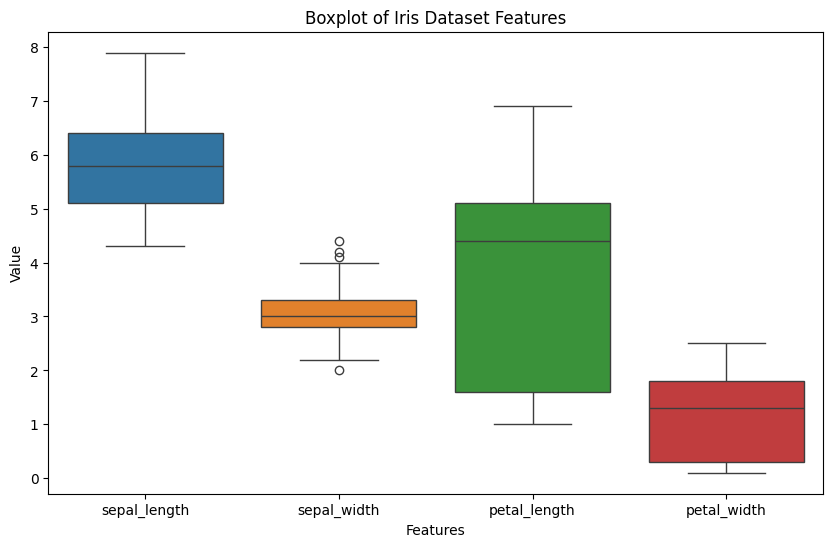

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of Iris Dataset Features")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()


Normalization Check Before KNN

I generated a boxplot of all four numerical features to analyze their value ranges. The boxplot shows that the features are on very different scales. For example, petal length ranges approximately from 1 cm to 7 cm, while petal width ranges only from 0.1 cm to 2.5 cm. Sepal features have smaller ranges compared to the petal features.

Because KNN is a distance-based algorithm, features with larger numeric ranges would dominate the distance calculation. Therefore, data must be normalized or standardized before applying KNN. This ensures that all features contribute equally to the distance metric.

**Machine Learning Algorithm – Start**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
y=df['target']

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [ ]:
#from joblib import wrap_non_picklable_objects
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
K=[1,3,5,10,20,50]
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    correct_predictions = np.count_nonzero(predictions == y_test)
    wrong_predictions = np.count_nonzero(predictions != y_test)

    print(f"Accuracy for k={k}: {accuracy}")
    print(f"Number of correct predictions for k={k}: {correct_predictions}")
    print(f"Number of wrong predictions for k={k}: {wrong_predictions}")
    print("-" * 40)




Accuracy for k=1: 0.9333333333333333
Number of correct predictions for k=1: 42
Number of wrong predictions for k=1: 3
----------------------------------------
Accuracy for k=3: 0.9555555555555556
Number of correct predictions for k=3: 43
Number of wrong predictions for k=3: 2
----------------------------------------
Accuracy for k=5: 0.9555555555555556
Number of correct predictions for k=5: 43
Number of wrong predictions for k=5: 2
----------------------------------------
Accuracy for k=10: 0.9555555555555556
Number of correct predictions for k=10: 43
Number of wrong predictions for k=10: 2
----------------------------------------
Accuracy for k=20: 0.9777777777777777
Number of correct predictions for k=20: 44
Number of wrong predictions for k=20: 1
----------------------------------------
Accuracy for k=50: 0.8888888888888888
Number of correct predictions for k=50: 40
Number of wrong predictions for k=50: 5
----------------------------------------


In [ ]:
len(X_test)

45

**After evaluating the model’s performance across different K values, I found that K = 20 provides the best results. With this value, the model achieved approximately 98% accuracy, correctly predicting 44 out of 45 test samples, which demonstrates strong performance.

In addition, K = 20 is neither too small—avoiding overfitting—nor too large—preventing underfitting. This value strikes an effective balance between model complexity and generalization. Therefore, I select K = 20 along with the chosen features to ensure that the model remains stable, reliable, and performs well on new data. But we need to be careful about overfitting and it needs to be more investigated to avoid overfitting because the number of data (150) is small compare to 20. **